# 聊聊 pandas

pandas 的 dataframe 类似 Excel 表格,有行列标签

Pandas 最基本的数据结构是Series 和 DataFrame。DataFrame 在本书中被叫做数据帧。

Series 是一种类似于一维数组的对象，相当于NumPy 一维数组；而DataFrame 是一种二维表格型的数据结构，可以容纳多种类型的数据，并且可以进行各种数据操作。

## 本章用到的函数

* pandas.DataFrame() 创建Pandas 数据帧
* pandas.DataFrame.add_prefix() 给DataFrame 的列标签添加前缀
* pandas.DataFrame.add_suffix() 给DataFrame 的列标签添加后缀
* pandas.DataFrame.axes 同时获得数据帧的行标签、列标签
* pandas.DataFrame.columns 查询数据帧的列标签
* pandas.DataFrame.count() 返回数据帧每列 (默认axis=0) 非缺失值数量
* pandas.DataFrame.describe() 用于生成关于数据帧统计摘要信息
* pandas.DataFrame.drop() 用于从DataFrame 中删除指定的行或列
* pandas.DataFrame.head() 用于查看数据帧的前几行数据，默认情况下，返回数据帧的前 5 行
* pandas.DataFrame.iiterrows() 遍历DataFrame 的行
* pandas.dataframe.iloc() 通过整数索引来选择 DataFrame 的行和列的索引器
* pandas.DataFrame.index 查询数据帧的行标签
* pandas.DataFrame.info 获取关于数据帧摘要信息
* pandas.DataFrame.isnull() 用于检查DataFrame 中的每个元素是否为缺失值NaN
* pandas.DataFrame.iteritems() 遍历DataFrame 的列
* pandas.dataframe.loc() 通过标签索引来选择 DataFrame 的行和列的索引器
* pandas.DataFrame.nunique() 计算数据帧中每一列的唯一值/独特值数量
* pandas.DataFrame.reindex() 用于重新排序DataFrame 的列标签
* pandas.DataFrame.rename() 对DataFrame 的索引标签、列标签或者它们的组合进行重命名
* pandas.DataFrame.reset_index() 将DataFrame 的行标签重置为默认的整数索引，默认并将原来的行标签转换为
新的一列
* pandas.DataFrame.set_axis() 重新设置DataFrame 的行或列标签
* pandas.DataFrame.set_index() 改变DataFrame 的索引结构
* pandas.DataFrame.shape 返回一个元组，其中包含数据帧的行数、列数
* pandas.DataFrame.size 用于返回数据帧中元素，即数据单元格总数
* pandas.DataFrame.sort_index() 按照索引的升序或降序对DataFrame 进行重新排序，默认 axis = 0
* pandas.DataFrame.tail() 用于查看数据帧的后几行数据，默认情况下，返回数据帧的后 5 行
* pandas.DataFrame.to_csv() 将DataFrame 数据保存为CSV 格式文件
* pandas.DataFrame.to_string() 将DataFrame 数据转换为字符串格式
* pandas.DataFrame.values 返回数据帧中的实际数据部分作为一个多维NumPy 数组
* pandas.Series() 创建Pandas Series
* seaborn.heatmap() 绘制热图
* seaborn.load_dataset() 加载Seaborn 示例数据集

## 比较 np.array 和 pd.dataframe

NumPy array 是多维数组对象，一般要求所有元素具有相同的数据类型，即本书前文提到的同质性(homogeneous)，从而保证高效存储运算。

Pandas DataFrame 是一个二维表格数据结构，类似于Excel 表格，包含行标签和列标签。Pandas
DataFrame 由多个列组成，每个列可以是不同的数据类型。

NumPy array 使用整数索引，类似于Python 列表。Pandas DataFrame 支持自定义行标签和列标签，可以使用标签而不仅仅是整数索引进行数据访问。(当然 dataframe 支持使用索引来进行访问)

两者可以进行相互转换

此外，Pandas DataFrame 还支持时间序列数据。Pandas DataFrame 中的时间序列数据通常是指具有时间索引的数据，其中时间可以是一系列日期、时间戳或时间间隔，对应于数据的每个行或每个数据点。

实际应用中，Pandas 和NumPy 常常一起使用，**Pandas 负责数据的组织、清洗和分析，而NumPy 负责底层数值计算。**

## 创建 dataframe:从dict / list / numpy array...

### dict

用Python 中的字典dict 来创建Pandas DataFrame。字典的键 key 将成为DataFrame 的列标签，而字典的值value 将成为DataFrame 的列数据。

请确保字典中的每个值 (列表) 的长度相同，以便正确创建DataFrame。如果长度不一致，将会引发异常

In [4]:
import pandas as pd
dict_eg = {'Integer': [1,2,3,4,5], 'Greek': ['alpha','beta','gamma','delta','epsilon']}

df_from_dict  = pd.DataFrame(dict_eg)  # 此时,默认的行坐标会是 0 开始的整数
print("df_from_dict: \n", df_from_dict)

df_from_dict2 = df_from_dict.set_index('Integer')  # 这一个操作可以让某一列用作 index
print("df_from_dict2: \n", df_from_dict2)
reset_df_from_dict2 = df_from_dict2.reset_index()
print("after reset:\n", reset_df_from_dict2)  # 原来作 index 的这一行还会加回去

df_from_dict: 
    Integer    Greek
0        1    alpha
1        2     beta
2        3    gamma
3        4    delta
4        5  epsilon
df_from_dict2: 
            Greek
Integer         
1          alpha
2           beta
3          gamma
4          delta
5        epsilon
after reset:
    Integer    Greek
0        1    alpha
1        2     beta
2        3    gamma
3        4    delta
4        5  epsilon


### list

列表 list 每个元素代表DataFrame 的一行数据

对于已经创建的数据帧，可以通过pandas.DataFrame.set_axis() 修改行标签 

In [4]:
import pandas as pd

list_fruits = [['apple', 11],['banana', 22],['cherry', 33],['durian', 44]]
df_list1 = pd.DataFrame(list_fruits)
print("df_list1: \n", df_list1)

# 采用默认行索引、列标签，Zero-based numbering
# 设定行索引
df_list1 = df_list1.set_axis(['a', 'b', 'c', 'd'], axis='index')  # 注意,一定要用值去接,不然的话,原来的 df_list1 并不会改变
print("after sex_aixs at aixs 'index' df_list1: \n", df_list1)
# 设定行标签
df_list1 = df_list1.set_axis(['Fruit', 'Number'], axis='columns')
print("afterset_axis at axis 'columns' df_list1: \n", df_list1)


# 在一开始的时候就设定行索引、列标签
df_list2 = pd.DataFrame(list_fruits,columns=['Fruit', 'Number'],index = ['a', 'b', 'c', 'd'])
print("df_list2: \n", df_list2)

df_list1: 
         0   1
0   apple  11
1  banana  22
2  cherry  33
3  durian  44
after sex_aixs at aixs 'index' df_list1: 
         0   1
a   apple  11
b  banana  22
c  cherry  33
d  durian  44
afterset_axis at axis 'columns' df_list1: 
     Fruit  Number
a   apple      11
b  banana      22
c  cherry      33
d  durian      44
df_list2: 
     Fruit  Number
a   apple      11
b  banana      22
c  cherry      33
d  durian      44


### numpy array

使用二维NumPy 数组创建Pandas DataFrame，可以直接将二维NumPy 数组作为参数传递给Pandas.DataFrame() 函数。NumPy 数组每一行的元素将成为 DataFrame 的一行，而每一列的元素将成为 DataFrame 的一列。

In [5]:
import pandas as pd
import numpy as np

np_array = np.random.normal(size = (10,4))  # normal 表示正态分布
# 形状为(10, 4)的二维数组


df_np = pd.DataFrame(np_array,columns=['X1', 'X2', 'X3', 'X4'])
print("df_np: \n", df_np)

# 用 for 循环生成列表
data = []
# 创建一个空list
for idx in range(10):
    data_idx = np.random.normal(size = (1,4)).tolist()
    data.append(data_idx[0]) # data 列表的每个元素是一个 1*4 的列表,作为 dataframe 的一行
# 注意，用list.append() 速度相对较快
df_loop = pd.DataFrame(data, columns = ['X1','X2','X3','X4'])
print("df_loop: \n", df_loop)

df_np: 
          X1        X2        X3        X4
0 -1.089141 -0.188825 -1.726498 -1.075234
1  1.402610  1.574150  0.869968  0.191631
2 -1.037455 -0.369089 -0.372337 -0.480050
3 -0.462101  0.248767 -0.249071  0.386324
4 -1.790284 -0.167052 -0.336474 -0.958327
5 -1.335453 -0.274317  0.343192 -0.329911
6  0.531893 -0.671030  0.778354 -0.453134
7 -0.594542 -0.160242 -1.846735 -0.191660
8 -0.893848  0.287387  2.186702  2.020901
9  0.184795  0.181590  1.930356 -0.028445
df_loop: 
          X1        X2        X3        X4
0 -0.341932 -0.909890  2.177097  2.487109
1 -0.853317 -0.434789  0.621515  0.203239
2 -0.496820 -1.717679 -0.433858  1.354673
3  0.113786 -0.416759 -0.222561 -1.131042
4 -1.780798  0.993172 -0.329850  0.001579
5 -0.222611 -0.629109  0.631631  1.315034
6  1.434788  1.096673  0.772224 -1.361517
7  0.277753 -0.358040 -1.295308  0.671072
8 -1.349356 -0.627004  0.849722  0.686044
9 -1.040884 -0.428296  0.283201  0.505499


## dataframe 操作:以鸢尾花数据为例子

从 sns 中 load_dataset(dataset_name)

to_string 和 to_csv 函数可以转换文件类型

iris_df: 
      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


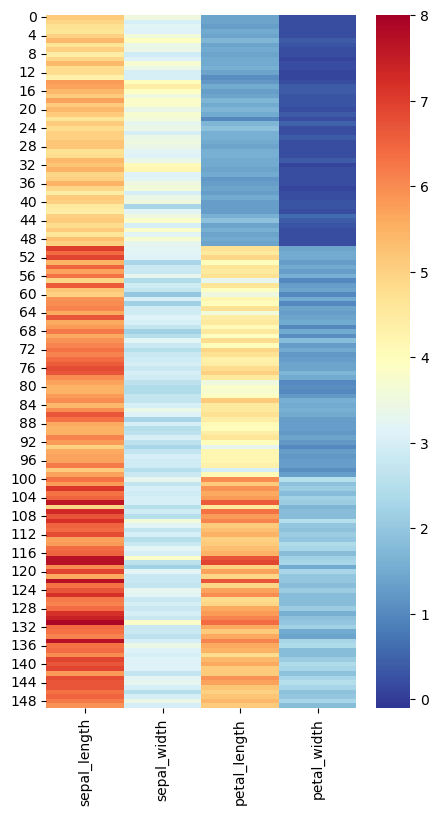

In [9]:

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

iris_df = sns.load_dataset('iris')

print("iris_df: \n", iris_df)

# 用热点图可视化鸢尾花数据
fig, ax = plt.subplots(figsize=(5, 9))
sns.heatmap(iris_df.iloc[:, 0:4], 
            cmap = 'RdYlBu_r',
            ax =ax,
            vmin = 0 , vmax = 8,
            cbar_kws= {'orientation': 'vertical'},
            annot= False)

fig.savefig("Figures" + os.sep+ "鸢尾花dataframe.svg", format = 'svg')

In [11]:
print(len(iris_df.to_string()))  # to_string() 可以把 dataframe 转化为字符串


10569


### 查看数据帧基本信息

1. df.index  # 查询行标签,获得行标签这个对象,有 rangeIndex/datatimeIndex...
> 读取行标签的方法则是: list(df.index) ,即将这个对象转换成 list 获取其值
> 以下是获取数据帧行数的几种不同方法：
> iris_df.shape[0]
> len(iris_df)
> len(iris_df.index)
> len(iris_df.axes[0])
2. df.colunms # 查询列标签,类上
3. df.axes # 同时获得行标签和列标签,得到的是它们两个组成的列表
4. df.values # 返回 df 中的实际数据部分作为一个 多维 np array,通常用于底层数值计算
5. df.info # 获取关于数据帧摘要信息，比如数据帧的结构、数据类型、缺失值情况、内存占用等基本信息，对于数据的初步探索和诊断非常有用。
6. df.descibe() # 生成关于数据帧统计摘要信息。它提供了数据的基本统计信息，如计数、均值、标准差、最小值、最大值和分位数等
7. df.unique() # 用于计算数据帧中**每一列**的唯一值
8. df.head()  # 展示前 n 行,默认为 5
9. df.tail() # 展示后 n 行,默认为 5
10. df.shape # 返回一个元组,包含数据帧的行数和列数
11. df.size # 返回数据帧中一共有多少个元素,即 行*列
12. df.count() # 返回数据帧**每列(默认 axis = 0) 非缺失值的数量**.这个函数可以快速了解每列中有多少个有效的非缺失数据，这对于数据清洗和数据质量的检查非常有用。将参数设置为axis=1，可以查询每行的非缺失值数量。
13. df.isnull() # 检查数据帧中每个元素是否为缺失值 NaN. 返回一个与原始 DataFrame 结构相同的布尔 DataFrame，其中的每个元素都对应于原始 DataFrame 中的一个元素，并且其值为True 表示该元素是缺失值，False 表示该元素不是缺失值。

In [16]:
print("iris.index: \n", iris_df.index)
print("iris.columns: \n", iris_df.columns)
print("iris.axes: \n", iris_df.axes)
print("iris.values: \n", iris_df.values[0:10,:])
print("iris.info: \n", iris_df.shape)
print("iris.describe: \n", iris_df.describe())

iris.index: 
 RangeIndex(start=0, stop=150, step=1)
iris.columns: 
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
iris.axes: 
 [RangeIndex(start=0, stop=150, step=1), Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')]
iris.values: 
 [[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']
 [5.4 3.9 1.7 0.4 'setosa']
 [4.6 3.4 1.4 0.3 'setosa']
 [5.0 3.4 1.5 0.2 'setosa']
 [4.4 2.9 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.1 'setosa']]
iris.info: 
 (150, 5)
iris.describe: 
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000    

In [17]:
unique_species = iris_df['species'].unique()
print("unique_species: \n", unique_species)
print("type of unique_species: \n", type(unique_species)) # 返回值是一个 array

unique_species: 
 ['setosa' 'versicolor' 'virginica']
type of unique_species: 
 <class 'numpy.ndarray'>


In [19]:
print(iris_df.count())
print(iris_df.count(axis = 1)) # axis 即从列的角度数过去,实际上就对应每行的非空元素个数

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64
0      5
1      5
2      5
3      5
4      5
      ..
145    5
146    5
147    5
148    5
149    5
Length: 150, dtype: int64


In [23]:
print(iris_df.isnull().head())  # True 代表缺失, False 代表不缺失

   sepal_length  sepal_width  petal_length  petal_width  species
0         False        False         False        False    False
1         False        False         False        False    False
2         False        False         False        False    False
3         False        False         False        False    False
4         False        False         False        False    False


### 循环操作

在Pandas 中可以使用iterrows() 方法来遍历DataFrame 的行，或者使用iteritems() 或 items() 方法来循环DataFrame 的列。另外，还可以直接使用for 循环来遍历DataFrame 的列。

In [26]:
# 遍历数据帧的行
for idx, row_idx in iris_df.iterrows():
    print('=================')
    print('Row index =',str(idx))
    print(row_idx['sepal_length'], row_idx['sepal_width'])

Row index = 0
5.1 3.5
Row index = 1
4.9 3.0
Row index = 2
4.7 3.2
Row index = 3
4.6 3.1
Row index = 4
5.0 3.6
Row index = 5
5.4 3.9
Row index = 6
4.6 3.4
Row index = 7
5.0 3.4
Row index = 8
4.4 2.9
Row index = 9
4.9 3.1
Row index = 10
5.4 3.7
Row index = 11
4.8 3.4
Row index = 12
4.8 3.0
Row index = 13
4.3 3.0
Row index = 14
5.8 4.0
Row index = 15
5.7 4.4
Row index = 16
5.4 3.9
Row index = 17
5.1 3.5
Row index = 18
5.7 3.8
Row index = 19
5.1 3.8
Row index = 20
5.4 3.4
Row index = 21
5.1 3.7
Row index = 22
4.6 3.6
Row index = 23
5.1 3.3
Row index = 24
4.8 3.4
Row index = 25
5.0 3.0
Row index = 26
5.0 3.4
Row index = 27
5.2 3.5
Row index = 28
5.2 3.4
Row index = 29
4.7 3.2
Row index = 30
4.8 3.1
Row index = 31
5.4 3.4
Row index = 32
5.2 4.1
Row index = 33
5.5 4.2
Row index = 34
4.9 3.1
Row index = 35
5.0 3.2
Row index = 36
5.5 3.5
Row index = 37
4.9 3.6
Row index = 38
4.4 3.0
Row index = 39
5.1 3.4
Row index = 40
5.0 3.5
Row index = 41
4.5 2.3
Row index = 42
4.4 3.2
Row index = 43
5.0 3.

In [ ]:
# 遍历数据帧的列
for column_idx in iris_df.iteritems():
    print(column_idx)

### 修改数据帧

修改行/列标签的函数:
1. df.rename() # 对 df 的索引标签/列标签或者它们的组合进行重命名
> rename() 默认返回新的 df,如果想要原地修改,可以讲 你 place 参数设置为 True
> 与 df.set_aixs 的区别在于,后者传入的参数是列表,并且原地修改,不会返回新 df 对象
2. df.add_suffix() # 给列标签添加后缀,病返回一个新的 df.
> 常用于合并多个 df,避免列名冲突,通过后缀区分来自不同 dataframe 的列
> 比如 `iris_df_suffix = iris_df.add_suffix('_col)`
> 其作用等于 `rename(iris_df.rename(lambda x: f'{x}_col'))`
3. df.add_prefix() # 类上,不过加的是前缀

In [32]:
import pandas as pd

data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'Gender': ['Female', 'Male', 'Male']}

df = pd.DataFrame(data)

# 使用rename函数修改列标签
new_df = df.rename(columns={'Name': 'Full Name', 'Age': 'Years'}) # columns 参数是一个字典,指定 columns 就会去改变列标签

print("Original DataFrame:")
print(df)
print("\nModified DataFrame:")
print(new_df)

# new_df = df.rename(index={0: 'a', 1: 'b', 2: 'c'}) # index 参数是一个字典,指定 index 就会去改变行标签
new_df = df.rename({0: 'a', 1: 'b', 2: 'c'},axis=0)  # aixs = 0 表示行标签
print("Original DataFrame:")
print(df)
print("\nModified DataFrame:")
print(new_df)

Original DataFrame:
      Name  Age  Gender
0    Alice   25  Female
1      Bob   30    Male
2  Charlie   35    Male

Modified DataFrame:
  Full Name  Years  Gender
0     Alice     25  Female
1       Bob     30    Male
2   Charlie     35    Male
Original DataFrame:
      Name  Age  Gender
0    Alice   25  Female
1      Bob   30    Male
2  Charlie   35    Male

Modified DataFrame:
      Name  Age  Gender
a    Alice   25  Female
b      Bob   30    Male
c  Charlie   35    Male


### 更改列标签顺序

df 创建后,可以修改列标签的顺序
1. df.reindex(colums = new_col_order)  # 这个默认丢进去一个列表的话就是改变行标签
2. df.loc[:, new_col_order]
3. df.iloc[:, new_col_order_0_based]
4. df.set_axis(new_col_order, axis = 1)

pandas.DataFrame.reindex() 方法用于重新排序DataFrame 的列标签
pandas.DataFrame.iloc() 是 pandas 中用于通过整数索引来选择 DataFrame 的行和列的索引器。与 pandas.DataFrame.loc 不同，iloc 使用整数索引而不是标签索引

In [33]:
# 自定义顺序
new_col_order = ['species',
                 'sepal_length', 'petal_length',
                 'sepal_width', 'petal_width']
iris_df[new_col_order]   # 可以看到相关的值,也会跟着移动的!

,species,sepal_length,petal_length,sepal_width,petal_width
0,setosa,5.1,1.4,3.5,0.2
1,setosa,4.9,1.4,3.0,0.2
2,setosa,4.7,1.3,3.2,0.2
3,setosa,4.6,1.5,3.1,0.2
4,setosa,5.0,1.4,3.6,0.2
...,...,...,...,...,...
145,virginica,6.7,5.2,3.0,2.3
146,virginica,6.3,5.0,2.5,1.9
147,virginica,6.5,5.2,3.0,2.0
148,virginica,6.2,5.4,3.4,2.3


In [36]:
iris_df.iloc[:, [4, 2, 1, 3, 0]]  # iloc 用来选取行和列,第一个参数是行,第二个参数是列,也达到了改变列顺序的目的

,species,petal_length,sepal_width,petal_width,sepal_length
0,setosa,1.4,3.5,0.2,5.1
1,setosa,1.4,3.0,0.2,4.9
2,setosa,1.3,3.2,0.2,4.7
3,setosa,1.5,3.1,0.2,4.6
4,setosa,1.4,3.6,0.2,5.0
...,...,...,...,...,...
145,virginica,5.2,3.0,2.3,6.7
146,virginica,5.0,2.5,1.9,6.3
147,virginica,5.2,3.0,2.0,6.5
148,virginica,5.4,3.4,2.3,6.2


In [38]:
df_2 = iris_df.reindex(columns=new_col_order)

### 改变行标签顺序

类似上面,不过注意 reindex 默认丢进去一个列表,就是改变行标签

### 删除

df.drop 函数用于从 df 中删除指定的行或者列.
> 默认情况下不对 原始 df 做修改,而是返回一个副本,除非将参数 inplace 设置为 True

In [39]:
import pandas as pd
import seaborn as sns
iris_df = sns.load_dataset("iris")
# 从Seaborn中导入鸢尾花数据帧
# 删除特定行
iris_df.drop(index=[0,1])
# 删除特定列
iris_df.drop(columns='species')

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
